# Wearable Device Data Analysis 


In this exercise, you will go through the process of training a machine learning model apply MLOps principles to manage and monitor your machine learning pipeline 

## Dataset Overview :

This dataset contains  signals collected by wearable devices that monitor various human activities and vital signs. It includes time series data for activities like walking, running, sitting, and vital signs such as heart rate and body temperature, recorded over different intervals.

Features:

- Activity Type: Categorical variable indicating the type of activity (e.g., walking, running, sitting, etc.).
- Heart Rate (BPM): Continuous variable representing beats per minute.
- Body Temperature (°C): Continuous variable representing the user's body temperature.
- Acceleration (m/s²): Three continuous variables representing acceleration on the x, y, and z axes.
- Timestamp: Time variable indicating when the reading was taken.

Labels:

- Stressed State: Binary variable indicating whether the vital signs correspond to a stressed state (1) or a relaxed state (0), which will be the target for our classifier.

You should use this dataset to train a classifier that predicts whether a person is stressed based on their activity type, heart rate, body temperature, and movement patterns.



## Exercise: Data Analysis

- Load the dataset provided in AMETICE page : "Wearable_Device_Dataset.csv", use describe(), info(), and head(), isnull() to get an overview of the data.



In [99]:
import pandas as pd
data  = "Device_Dataset.csv"
df = pd.read_csv(data)
display(df.head())
display(df.info())
#resultat = df[df["Activity Type"].isna()]
#print(resultat)
#df = df.drop(1000)
df.describe()



,Activity Type,Heart Rate (BPM),Body Temperature (°C),Acceleration X (m/s²),Acceleration Y (m/s²),Acceleration Z (m/s²),Stressed State
0,walking,66.681663,37.236851,-0.675178,-1.907808,-0.863494,False
1,cycling,80.490124,37.070160,-0.144519,-0.860385,-0.031203,False
2,walking,70.650875,36.507567,-0.792420,-0.413606,0.018017,True
3,cycling,92.427842,36.183344,-0.307962,1.887688,0.472630,True
4,running,97.867898,36.897490,-1.893615,0.556553,-1.366858,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Activity Type          1000 non-null   object 
 1   Heart Rate (BPM)       1000 non-null   float64
 2   Body Temperature (°C)  1000 non-null   float64
 3   Acceleration X (m/s²)  1000 non-null   float64
 4   Acceleration Y (m/s²)  1000 non-null   float64
 5   Acceleration Z (m/s²)  1000 non-null   float64
 6   Stressed State         1000 non-null   bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 48.0+ KB


None

,Heart Rate (BPM),Body Temperature (°C),Acceleration X (m/s²),Acceleration Y (m/s²),Acceleration Z (m/s²)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,81.508765,36.534239,0.005834,-0.018719,-0.049274
std,19.844475,0.510322,0.983454,1.027133,0.992380
min,31.298668,34.790434,-3.019512,-2.929449,-3.176704
25%,66.262109,36.192353,-0.648000,-0.737420,-0.682605
50%,78.936837,36.538253,-0.000251,0.000185,-0.018242
75%,94.029940,36.890435,0.660915,0.666945,0.639123
max,160.412135,38.187031,3.926238,3.243093,3.112910


### Explore and Visualize the Data
* Provide a statistical summary of the data.
* Create visualizations to understand the relationships in the data.
- Plot histograms and boxplots for numerical features to understand distributions.
- Plot bar charts for the categorical 'Activity Type' feature to check class balance.
- Explore the relationship between features and the target variable (stressed state)

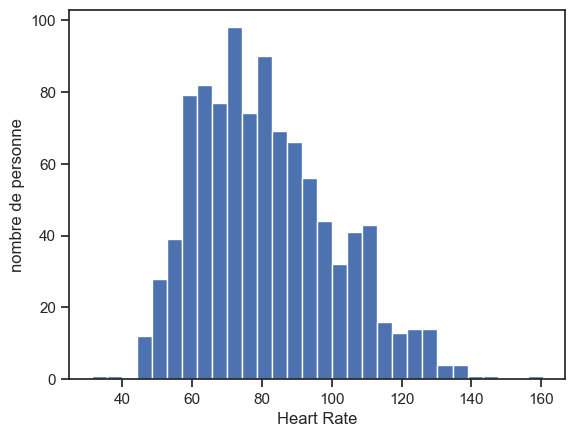

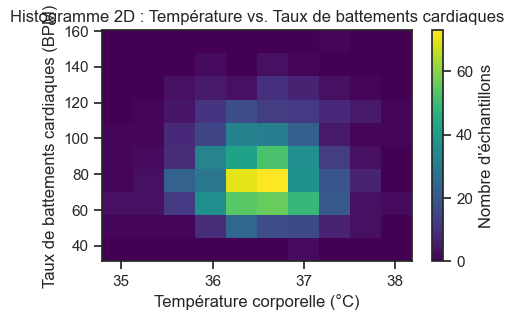

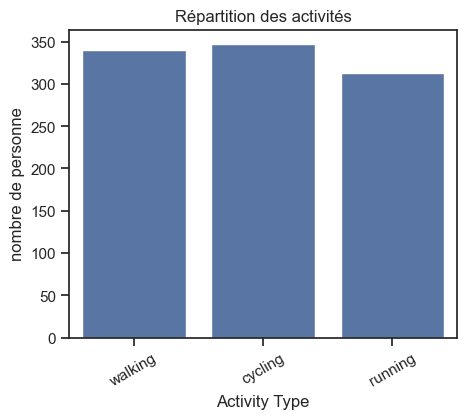

In [100]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df['Heart Rate (BPM)'], bins = 30)
plt.xlabel('Heart Rate')
plt.ylabel('nombre de personne')
plt.show()


temperature = df['Body Temperature (°C)']
heart_rate = df['Heart Rate (BPM)']

# Créer un histogramme 2D
plt.figure(figsize=(5, 3))
plt.hist2d(temperature, heart_rate, bins=(10, 10), cmap='viridis')
plt.colorbar(label='Nombre d\'échantillons')
plt.xlabel('Température corporelle (°C)')
plt.ylabel('Taux de battements cardiaques (BPM)')
plt.title('Histogramme 2D : Température vs. Taux de battements cardiaques')
plt.show()


import seaborn as sns

# Créer un diagramme à barres pour la colonne "Activity Type"
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('nombre de personne')
plt.title('Répartition des activités')
plt.xticks(rotation=30)
plt.show()


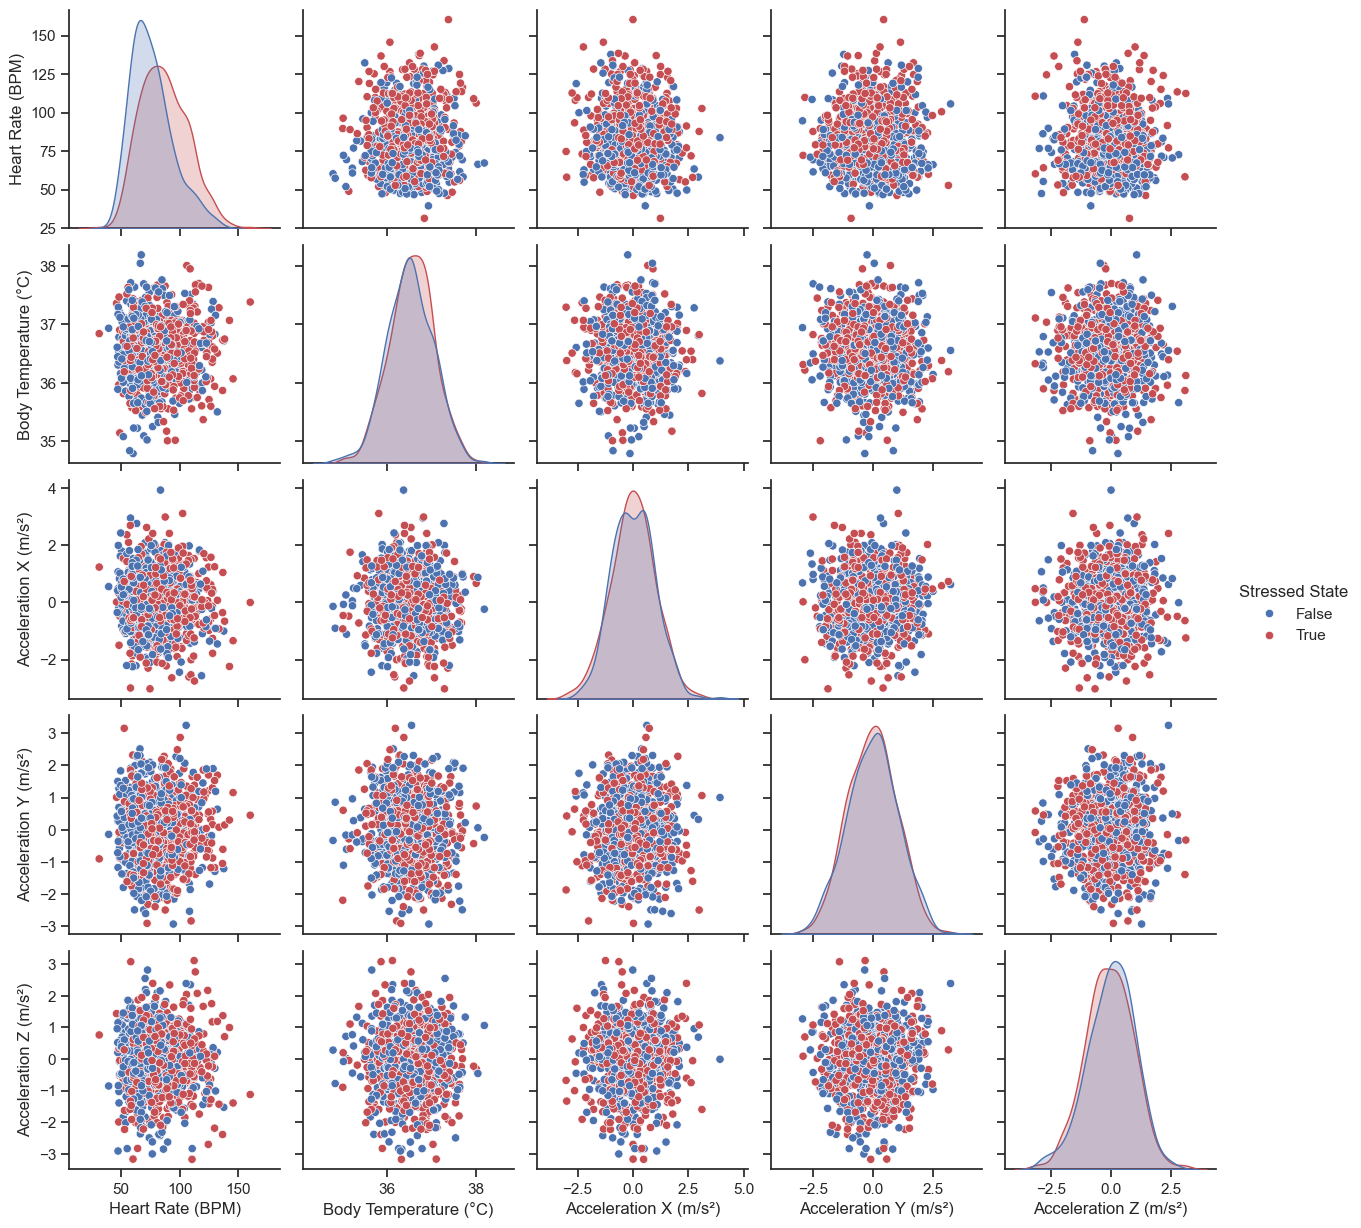

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un pairplot pour les caractéristiques numériques
sns.set(style="ticks")
pairplot = sns.pairplot(df, hue="Stressed State", palette={True: 'r', False: 'b'})
plt.show()


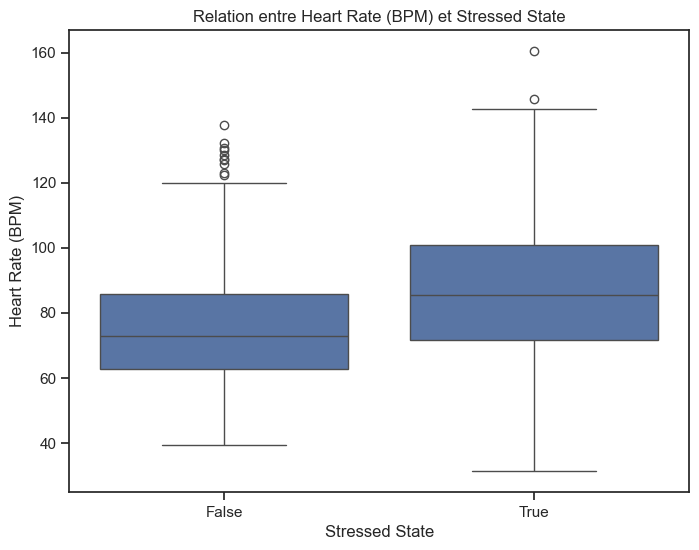

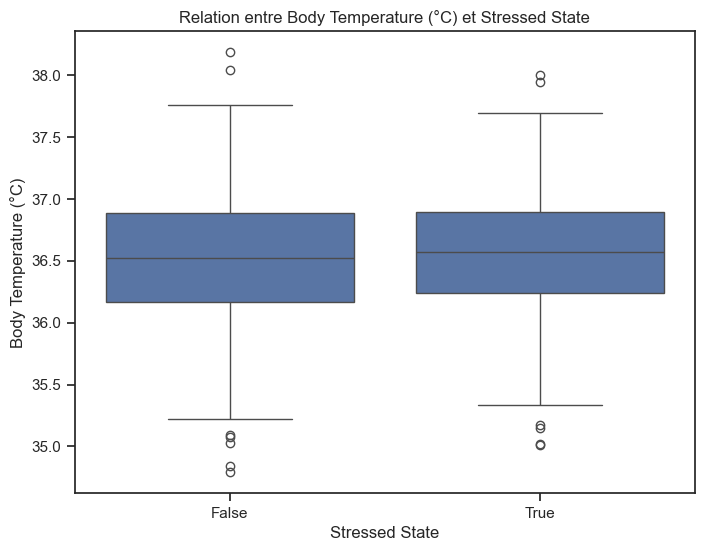

In [102]:
# Diagramme en boîte pour "Heart Rate (BPM)" en fonction de "Stressed State"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Stressed State', y='Heart Rate (BPM)')
plt.xlabel('Stressed State')
plt.ylabel('Heart Rate (BPM)')
plt.title('Relation entre Heart Rate (BPM) et Stressed State')
plt.show()

# Diagramme en boîte pour "Body Temperature (°C)" en fonction de "Stressed State"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Stressed State', y='Body Temperature (°C)')
plt.xlabel('Stressed State')
plt.ylabel('Body Temperature (°C)')
plt.title('Relation entre Body Temperature (°C) et Stressed State')
plt.show()



## Exercise: Data Preprocessing

### Task: Handle Categorical Data and Split the Dataset
* Convert categorical data to a suitable format for machine learning.
* Split the data into training and test sets.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# En va essai de extraire les colonne qui on des texte ou des string
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

X = df.drop('Stressed State', axis=1)
y = df['Stressed State']

display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X,y)
print("Le porcentage de données pour la partie X_train est :", len(X_train))
print("Le porcentage de données pour la partie X_test est :", len(X_test))
print("Le porcentage de données pour la partie y_train est :", len(y_train))
print("Le porcentage de données pour la partie y_test est :", len(y_test))

,Activity Type,Heart Rate (BPM),Body Temperature (°C),Acceleration X (m/s²),Acceleration Y (m/s²),Acceleration Z (m/s²)
0,2,66.681663,37.236851,-0.675178,-1.907808,-0.863494
1,0,80.490124,37.070160,-0.144519,-0.860385,-0.031203
2,2,70.650875,36.507567,-0.792420,-0.413606,0.018017
3,0,92.427842,36.183344,-0.307962,1.887688,0.472630
4,1,97.867898,36.897490,-1.893615,0.556553,-1.366858
...,...,...,...,...,...,...
995,0,76.439899,37.200350,0.077481,0.028458,-0.048965
996,2,78.963655,36.468248,0.257753,-2.077812,0.711411
997,1,112.438246,36.124072,-1.241761,-0.320298,3.112910
998,1,95.417031,36.331404,0.334176,1.643378,0.808036


     Activity Type  Heart Rate (BPM)  Body Temperature (°C)  \
0                2         66.681663              37.236851   
1                0         80.490124              37.070160   
2                2         70.650875              36.507567   
3                0         92.427842              36.183344   
4                1         97.867898              36.897490   
..             ...               ...                    ...   
995              0         76.439899              37.200350   
996              2         78.963655              36.468248   
997              1        112.438246              36.124072   
998              1         95.417031              36.331404   
999              2         67.419081              36.119863   

     Acceleration X (m/s²)  Acceleration Y (m/s²)  Acceleration Z (m/s²)  
0                -0.675178              -1.907808              -0.863494  
1                -0.144519              -0.860385              -0.031203  
2                -

## Exercise: Model Training

### Task: Train Logistic Regression and Random Forest Classifiers
* Use the preprocessed data to train the models.
* Feel free to tweak model parameters.

In [87]:
#Régression logistique.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Créer un modèle de régression logistique
logistic_regression_model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'apprentissage
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
accurancy = accuracy_score(y_test, y_pred)
print('l\'accurancy du model régression logistique est ' ,accurancy * 100,"%")

l'accurancy du model régression logistique est  62.0 %


In [95]:
# Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

random_forest_model = RandomForestClassifier(n_estimators=5000, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("l\'accurancy du model Random Forest Classifiers est {:.2f}%".format(accuracy * 100))

l'accurancy du model Random Forest Classifiers est 60.50%


## Exercise: Model Evaluation

### Task: Evaluate the Performance of Your Models
* Use appropriate metrics to evaluate your models.
* Compare the results of both models.

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the Random Forest model
y_rf_pred = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_rf_pred)
precision_rf = precision_score(y_test, y_rf_pred)
recall_rf = recall_score(y_test, y_rf_pred)
f1_score_rf = f1_score(y_test, y_rf_pred)
confusion_matrix_rf = confusion_matrix(y_test, y_rf_pred)

#Logistic Regression model
y_lr_pred = logistic_regression_model.predict(X_test)  
accuracy_lr = accuracy_score(y_test, y_lr_pred)
precision_lr = precision_score(y_test, y_lr_pred)
recall_lr = recall_score(y_test, y_lr_pred)
f1_score_lr = f1_score(y_test, y_lr_pred)
confusion_matrix_lr = confusion_matrix(y_test, y_lr_pred)


print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_score_rf:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix_rf}")
print("TP est 58 | FP est 36 | FN est 43 | TN est 63")

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_score_lr:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix_lr}")
print("TP est 58 | FP est 33 | FN est 43 | TN est 66")


Random Forest Classifier Metrics:
Accuracy: 0.60
Precision: 0.59
Recall: 0.64
F1 Score: 0.61
Confusion Matrix:
[[58 43]
 [36 63]]
Logistic Regression Metrics:
Accuracy: 0.62
Precision: 0.61
Recall: 0.67
F1 Score: 0.63
Confusion Matrix:
[[58 43]
 [33 66]]
TP est 58 | FP est 33 | FN est 43 | TN est 66


## Introduction to MLflow Monitoring

MLflow is a platform for managing the machine learning lifecycle, including experimentation, reproducibility, and deployment. You will use MLflow to track your experiments in this exercise. check the documentation: https://mlflow.org/docs/latest/index.html

## Exercise: MLflow Monitoring

### Task: Integrate MLflow for Experiment Tracking
* Set up MLflow in your notebook.
* Log parameters, metrics, and models for each experiment you run.

In [103]:
pip install mlflow


  Obtaining dependency information for mlflow from https://files.pythonhosted.org/packages/64/4a/514286f441cade293efcdf77c9733d4ea3d50cd67e8b444beca1b9d85572/mlflow-2.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for databricks-cli<1,>=0.8.7 from https://files.pythonhosted.org/packages/ae/a3/d56f8382c40899301f327d1c881278b09c9b8bc301c2c111633a0346d06e/databricks_cli-0.18.0-py2.py3-none-any.whl.metadata
  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
  Obtaining dependency information for gitpython<4,>=2.1.0 from https://files.pythonhosted.org/packages/8d/c4/82b858fb6483dfb5e338123c154d19c043305b01726a67d89532b8f8f01b/GitPython-3.1.40-py3-none-any.whl.metadata
  Obtaining dependency information for pyyaml<7,>=5.1 from https://files.pythonhosted.org/packages/24/97/9b59b43431f98d01806b288532da38099cc6f2fea0f3d712e21e269c0279/PyYAML-6.0.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for importlib-metadata!=4.7.0,<7,>=3.7.0 from https://f

In [111]:
pip install mlflow


Note: you may need to restart the kernel to use updated packages.


In [115]:
import mlflow
import mlflow.sklearn

# Start a new MLflow run
mlflow.start_run()


<ActiveRun: >

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression_model = LogisticRegression(C=1.0, random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Log parameters
mlflow.log_params(logistic_regression_model.get_params())
y_pred = logistic_regression_model.predict(X_test)

# Calculate and log accuracy
accuracy = accuracy_score(y_test, y_pred)
mlflow.log_metric("accuracy", accuracy)

print(accuracy)
# Log the model
mlflow.sklearn.log_model(logistic_regression_model, "logistic_regression_model")
mlflow.end_run()

0.62


c:\Users\aghil\anaconda3\envs\Tp1\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\aghil\anaconda3\envs\Tp1\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Conclusion 

Write some note about the performance of the classifiers and the insights gained from the data analysis and MLflow monitoring.
Consider exploring more in-depth analysis or trying different machine learning models.